## data basic features - train one gradient boosting regressor

Content:
- data: containt the data basic features (units_solds, peak) but in addition the feature prices is added with the prices of all regions. Also the data is splitted to train different models for each region

- Model: artifact that contain the model and the feature engineering (previosly a feature engineering was done, but for example objetive, in this part a do more feature engineering and "compile" it with the model)

- TRAIN ONLY ONE MODEL TO FIT ALL THE DATA FOR ALL REGIONS (no split the model)

- **DO THE SAME AS NOTEBOOK 3, BUT TRAINING A GRADIENT BOOSTING INSTEAD OF LINEAR REGRESSION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### 0. Root repo

In [2]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('\\')[:-1]
root_path = '\\'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  D:\github-mi-repo\Examples-Gurobi-ML


### 1. Read data

In [3]:
path_data_prices_regions = 'artifacts/data/data_prices_regions.pkl'

data = pd.read_pickle(path_data_prices_regions)

data.head()

,units_sold,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,,
2015-01-04,3.382800,Great_Lakes,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,2.578275,Midsouth,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,5.794411,West,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,3.204112,Southeast,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,0.321824,Northern_New_England,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89


### 2. Generate X, y, list features, list segmentation data

In [4]:
""" Create list regions """
list_regions = data['region'].unique().tolist()
list_regions.sort()
list_regions

['Great_Lakes',
 'Midsouth',
 'Northeast',
 'Northern_New_England',
 'Plains',
 'SouthCentral',
 'Southeast',
 'West']

In [5]:
""" Define features and target """
# target
target = 'units_sold'
list_target = [target]

# list features - all variables in dataframe that are not target
list_features = list(set(data.columns.tolist()) - set([target]))


######  set manually list features
list_columns_prices_regions = ['price_' + name_region for name_region in list_regions] # generate a list of all the columns of prices (prices for each region)
list_columns_prices_regions = [column.lower() for column in list_columns_prices_regions]
list_features = ['region'] + ['peak'] + list_columns_prices_regions # list features hardcoded


print('list_features: ', list_features)
print('list_target: ', list_target)

list_features:  ['region', 'peak', 'price_great_lakes', 'price_midsouth', 'price_northeast', 'price_northern_new_england', 'price_plains', 'price_southcentral', 'price_southeast', 'price_west']
list_target:  ['units_sold']


In [6]:
""" create data X - features // y - target """
data_X = data[list_features]
data_y = data[list_target]

In [7]:
data_X.head()

,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,
2015-01-04,Great_Lakes,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,Midsouth,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,West,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,Southeast,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89
2015-01-04,Northern_New_England,0,1.02,1.1,1.09,1.05,1.01,0.77,0.98,0.89


In [8]:
data_y.head()

,units_sold
date,
2015-01-04,3.382800
2015-01-04,2.578275
2015-01-04,5.794411
2015-01-04,3.204112
2015-01-04,0.321824


### 3. Split - train - test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_X, 
                                                    data_y, 
                                                    train_size = 0.7, 
                                                    random_state = 42
                                                   )

In [10]:
print('shapes')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

shapes
X_train:  (2116, 10)
y_train:  (2116, 1)
X_test:  (908, 10)
y_test:  (908, 1)


In [11]:
X_train.head(2)

,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,
2016-06-05,Plains,1,1.010000,1.140000,1.350000,1.180000,0.93000,0.83000,0.910000,0.820000
2019-08-18,West,0,1.363272,1.428336,1.521049,1.549343,1.42877,1.20756,1.214219,1.365767


In [12]:
y_train.head(2)

,units_sold
date,
2016-06-05,2.330438
2019-08-18,5.568754


In [13]:
X_test.head(2)

,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,
2022-05-08,Southeast,1,1.309871,1.41175,1.61657,1.496001,1.472752,1.191777,1.471889,1.47211
2015-08-09,West,0,1.120000,1.15000,1.10000,1.030000,1.140000,0.890000,1.000000,1.01000


In [14]:
y_test.head(2)

,units_sold
date,
2022-05-08,4.477437
2015-08-09,5.531488


### 4. Pipeline processing data
- Region string, transform into categorical features
- Peak ok
- price normalize continuous variable

In [15]:
# transformer data sklearn
feat_transform = make_column_transformer(
    (OneHotEncoder(drop="first"), ["region"]),
    (StandardScaler(), list_columns_prices_regions),
    ("passthrough", ["peak"]),
    verbose_feature_names_out=False, # conserve original column names
    remainder='drop'
)

In [16]:
X_train

,region,peak,price_great_lakes,price_midsouth,price_northeast,price_northern_new_england,price_plains,price_southcentral,price_southeast,price_west
date,,,,,,,,,,
2016-06-05,Plains,1,1.010000,1.140000,1.350000,1.180000,0.930000,0.830000,0.910000,0.820000
2019-08-18,West,0,1.363272,1.428336,1.521049,1.549343,1.428770,1.207560,1.214219,1.365767
2016-12-04,Northern_New_England,0,0.970000,1.200000,1.400000,1.120000,1.090000,0.760000,0.990000,0.930000
2020-05-10,Midsouth,1,1.159565,1.135200,1.443698,1.159882,1.085904,0.858258,1.160793,1.068357
2022-05-08,Northern_New_England,1,1.309871,1.411750,1.616570,1.496001,1.472752,1.191777,1.471889,1.472110
...,...,...,...,...,...,...,...,...,...,...
2018-11-25,Plains,0,1.270000,1.240000,1.420000,1.420000,1.290000,0.880000,1.140000,1.240000
2017-08-13,West,0,1.570000,1.370000,1.490000,1.240000,1.430000,1.050000,1.420000,1.340000
2017-09-17,SouthCentral,0,1.860000,1.550000,1.540000,1.590000,1.660000,1.270000,1.660000,1.530000


In [17]:
# shape output
feat_transform.fit_transform(X_train).shape

(2116, 16)

In [18]:
# example output
feat_transform.fit_transform(X_train)[0, :]

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        , -0.83471069, -0.33554031,  0.10552406,
       -0.369726  , -1.18261794, -0.33284042, -1.14444793, -1.32109943,
        1.        ])

In [19]:
# original example output
X_train.iloc[0, :]

region                        Plains
peak                               1
price_great_lakes               1.01
price_midsouth                  1.14
price_northeast                 1.35
price_northern_new_england      1.18
price_plains                    0.93
price_southcentral              0.83
price_southeast                 0.91
price_west                      0.82
Name: 2016-06-05 00:00:00, dtype: object

### 5. Pipeline processing data + train model

In [20]:
# NOTEBOOK 1 - TRAIN A LINEAR MODEL
#model_pipeline = make_pipeline(feat_transform, LinearRegression())

In [21]:
# IN THIS NOTEBOOK TRAIN A GRADIENT BOOSTING
model_pipeline = make_pipeline(feat_transform, 
                               GradientBoostingRegressor(n_estimators=100, max_leaf_nodes = 20, loss = 'absolute_error', random_state = 123)
                              )

### 6. Train with cross validation

In [22]:
# get scores of cross validation - R2
scores = cross_val_score(model_pipeline, X_train, y_train, cv=5)
scores

D:\Anaconda\envs\data-science-python-3-10-gurobi\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\data-science-python-3-10-gurobi\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\data-science-python-3-10-gurobi\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\data-science-python-3-10-gurobi\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was pass

array([0.90232709, 0.90913577, 0.91602928, 0.90713995, 0.8914348 ])

In [23]:
pd.DataFrame(scores).describe()

,0
count,5.000000
mean,0.905213
std,0.009141
min,0.891435
25%,0.902327
50%,0.907140
75%,0.909136
max,0.916029


### 7. Train model with all train dataset

In [24]:
model_pipeline.fit(X_train, y_train)

D:\Anaconda\envs\data-science-python-3-10-gurobi\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['region']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['price_great_lakes',
                                                   'price_midsouth',
                                                   'price_northeast',
                                                   'price_northern_new_england',
                                                   'price_plains',
                                                   'price_southcentral',
                                                   'price_southeast',
                                                   'price_west']),
                                                 ('passthrough', 'passthrough',
                                                  ['peak'])],
                                   verbose_feature_names_out=False)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(loss='absolute_error',
                                           max_leaf_nodes=20,
                                           random_state=123))])

## 8. Evaluate Performance Model

## -> Performance all data
Evaluate performance of the model with all the train and test data

#### 8.0 Get y_train_pred , y_test_pred

In [25]:
# y train pred
y_train_pred = model_pipeline.predict(X_train)
y_train_pred = pd.DataFrame(y_train_pred)

# y test pred
y_test_pred = model_pipeline.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred)

#### 8.1. Evaluate performance model - metrics

In [26]:
def print_metrics_evaluation(y_train,  y_train_pred, y_test, y_test_pred):
    """
    Print metrics of supervised models. Train and Test metrics

    Args:
        y_train
        y_train_pred
        y_test
        y_test_pred
    """
    # evaluate model
    
    # r2
    r2_train = r2_score(y_train, y_train_pred).round(3)
    r2_test = r2_score(y_test, y_test_pred).round(3)
    
    print('\nR2')
    print('r2_train: ', r2_train)
    print('r2_test: ', r2_test)
    
    
    # mae
    mae_train = mean_absolute_error(y_train, y_train_pred).round(3)
    mae_test = mean_absolute_error(y_test, y_test_pred).round(3)
    
    print('\nMAE')
    print('mae_train: ', mae_train)
    print('mae_test: ', mae_test)
    
    # mse
    mse_train = mean_squared_error(y_train, y_train_pred, squared = True).round(3)
    mse_test= mean_squared_error(y_test, y_test_pred, squared = True).round(3)
    
    print('\nMSE')
    print('mse_train: ', mse_train)
    print('mse_test: ', mse_test)
    
    
    # rmse
    rmse_train = mean_squared_error(y_train, y_train_pred, squared = False).round(3)
    rmse_test= mean_squared_error(y_test, y_test_pred, squared = False).round(3)
    
    print('\nRMSE')
    print('rmse_train: ', rmse_train)
    print('rmse_test: ', rmse_test)

In [27]:
print_metrics_evaluation(y_train,  y_train_pred, y_test, y_test_pred)


R2
r2_train:  0.92
r2_test:  0.916

MAE
mae_train:  0.401
mae_test:  0.423

MSE
mse_train:  0.344
mse_test:  0.348

RMSE
rmse_train:  0.587
rmse_test:  0.59


#### 8.2 Evaluate performance model - y true vs y_predicted

In [29]:
def plot_y_true_vs_y_pred(df_y_true, df_y_pred, title_plot):
    """
    Plot y_true vs y_pred. Both in format dataframe
    """
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(df_y_true, df_y_pred, alpha=0.3, marker='x', label='y_true vs y_pred')

    # Add bisectriz
    x = np.linspace(df_y_true.min()[0], df_y_true.max()[0], df_y_true.shape[0])
    y = x  # Bisectriz: y = x
    ax.plot(x, y, label='Bisectriz', color='red', alpha=0.3)

    # Add names to axis
    ax.set_xlabel('Y true')
    ax.set_ylabel('Y pred')
    
    ax.set_title(title_plot)
    ax.legend()

    return fig

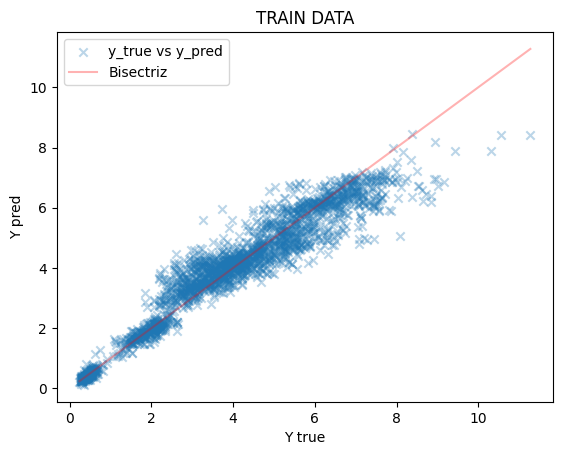

In [30]:
# plot TRAIN
plot_true_pred_train = plot_y_true_vs_y_pred(df_y_true = y_train,
                                               df_y_pred = y_train_pred,
                                             title_plot = 'TRAIN DATA'
                                              )

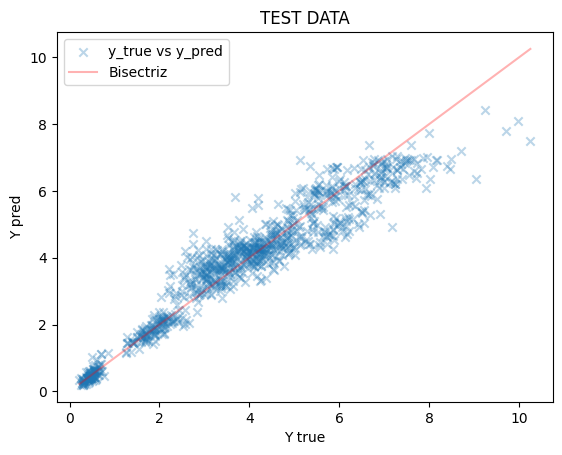

In [31]:
# plot TEST
plot_true_pred_test = plot_y_true_vs_y_pred(df_y_true = y_test,
                     df_y_pred = y_test_pred,
                                            title_plot = 'TEST DATA'
                     )

## -> Performance by region
Evaluate performance of the model with the data segmented. In this example, divide by region

#### 8.3 Evaluate performance model by region - metrics by region

In [32]:
def get_metric_each_region(X, y, model, list_regions):
    """
    Split data by each region and calculate the metric of a segmented data
    """

    ## list to save metrics to calculate
    list_r2_each_region = []
    list_mae_each_region = []
    list_mse_each_region = []
    list_rmse_reach_region = []

    # add column region in data "y" to filter data by region
    y['region'] = X[['region']]

    for region_name in list_regions:
        #print(region_name)
    
        # generate X filtered by region
        X_filter_region = X[X['region'] == region_name]
        
        # generate y filtered by region
        y_filter_region = y[y['region'] == region_name]
        y_filter_region = y_filter_region.drop(columns = 'region')
        
        # predict
        y_filter_region_pred = model.predict(X_filter_region)
        y_filter_region_pred = pd.DataFrame(y_filter_region_pred)
        
        # evaluate metric
        r2_aux = r2_score(y_filter_region, y_filter_region_pred).round(3) # r2
        mae_aux = mean_absolute_error(y_filter_region, y_filter_region_pred).round(3)
        mse_aux = mean_squared_error(y_filter_region, y_filter_region_pred, squared = True).round(3)
        rmse_aux = mean_squared_error(y_filter_region, y_filter_region_pred, squared = False).round(3)

        # save in a list
        list_r2_each_region.append(r2_aux)
        list_mae_each_region.append(mae_aux)
        list_mse_each_region.append(mse_aux)
        list_rmse_reach_region.append(rmse_aux)


    #save as df
    df_metrics_each_region = pd.DataFrame()
    df_metrics_each_region['region'] = list_regions
    df_metrics_each_region['r2'] = list_r2_each_region
    df_metrics_each_region['mae'] = list_mae_each_region
    df_metrics_each_region['mse'] = list_mse_each_region
    df_metrics_each_region['rmse'] = list_rmse_reach_region

    return df_metrics_each_region

In [33]:
# r2 each region - TRAIN
get_metric_each_region(X = X_train.copy(),
                      y = y_train.copy(),
                      model = model_pipeline,
                      list_regions = list_regions
                      )

,region,r2,mae,mse,rmse
0,Great_Lakes,0.466,0.453,0.323,0.568
1,Midsouth,0.617,0.327,0.182,0.426
2,Northeast,0.511,0.582,0.611,0.781
3,Northern_New_England,0.346,0.065,0.009,0.095
4,Plains,0.710,0.156,0.044,0.209
5,SouthCentral,0.555,0.474,0.459,0.677
6,Southeast,0.523,0.608,0.576,0.759
7,West,0.564,0.544,0.544,0.737


In [34]:
# r2 each region - TEST
get_metric_each_region(X = X_test.copy(),
                      y = y_test.copy(),
                      model = model_pipeline,
                       list_regions = list_regions
                      )

,region,r2,mae,mse,rmse
0,Great_Lakes,0.356,0.451,0.298,0.546
1,Midsouth,0.597,0.367,0.214,0.462
2,Northeast,0.476,0.516,0.456,0.676
3,Northern_New_England,-0.147,0.093,0.017,0.130
4,Plains,0.616,0.160,0.043,0.206
5,SouthCentral,0.514,0.569,0.588,0.767
6,Southeast,0.497,0.606,0.585,0.765
7,West,0.524,0.624,0.606,0.778


#### 8.4 Evaluate y_true vs y_pred by region (individual plot)

In [35]:
def plot_y_true_vs_y_pred_each_regions(X, y, model, list_regions):
    """
    Plot y_true vs y_predict for each region.
    Use the individual function to plot y_true vs y_pred
    """
    
    # add column region in data "y" to filter data by region
    y['region'] = X[['region']]

    for region_name in list_regions:
        #print(region_name)
    
        # generate X filtered by region
        X_filter_region = X[X['region'] == region_name]
        
        # generate y filtered by region
        y_filter_region = y[y['region'] == region_name]
        y_filter_region = y_filter_region.drop(columns = 'region')
        
        # predict
        y_filter_region_pred = model.predict(X_filter_region)
        y_filter_region_pred = pd.DataFrame(y_filter_region_pred)
    
    
        # plot
        plot_y_true_vs_y_pred(df_y_true = y_filter_region,
                             df_y_pred = y_filter_region_pred,
                              title_plot = f'y_true vs y_pred for region: {region_name}'
                             )

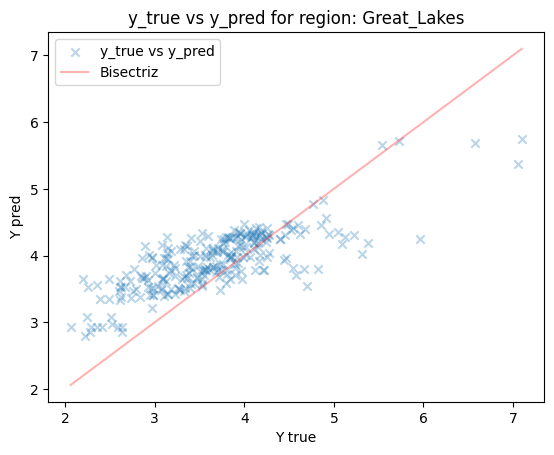

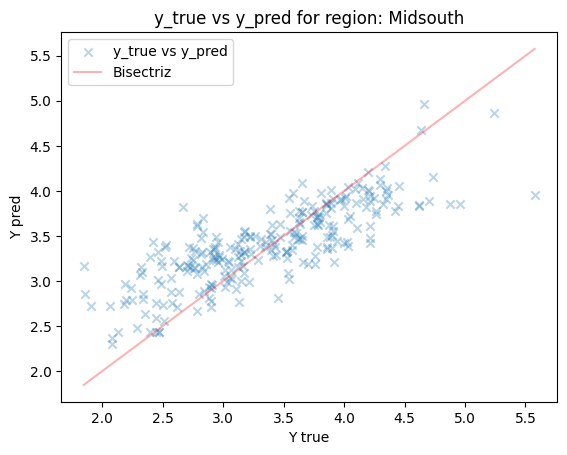

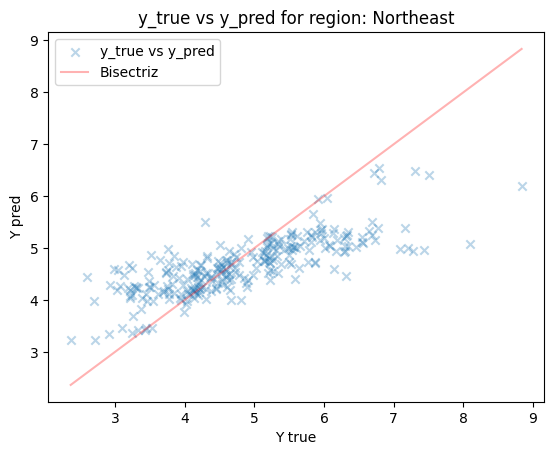

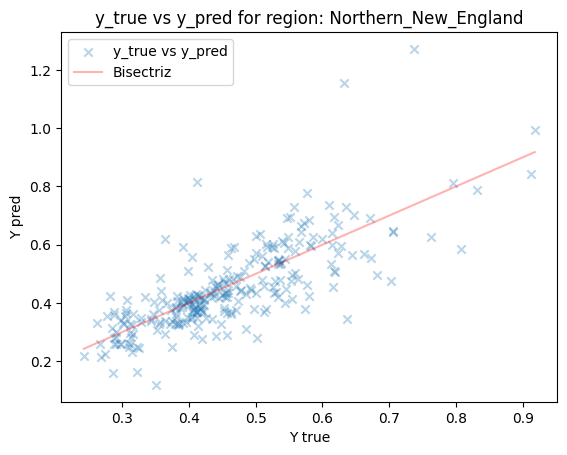

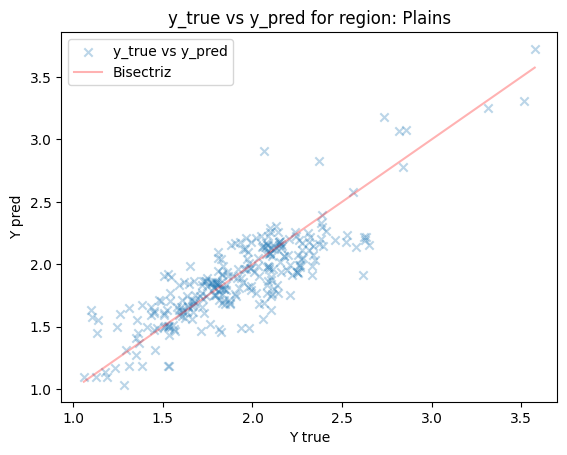

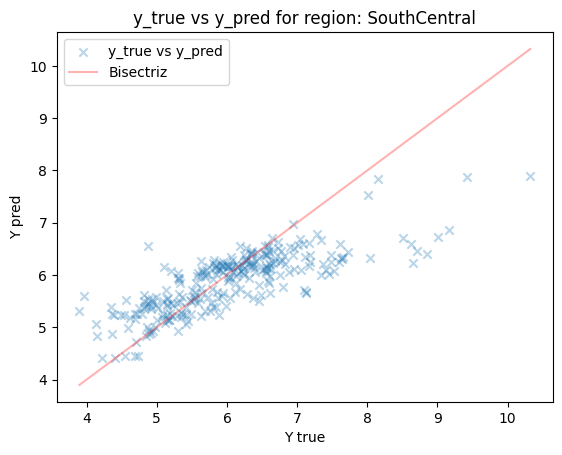

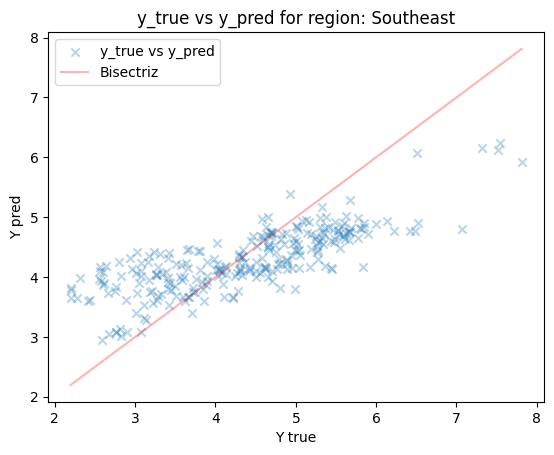

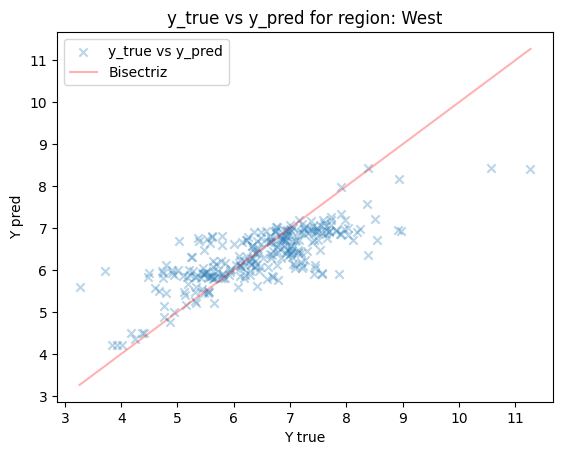

In [36]:
# DATA TRAIN
plot_y_true_vs_y_pred_each_regions(X = X_train.copy(),
                                   y = y_train.copy(),
                                   model = model_pipeline,
                                   list_regions =  list_regions
                                  )

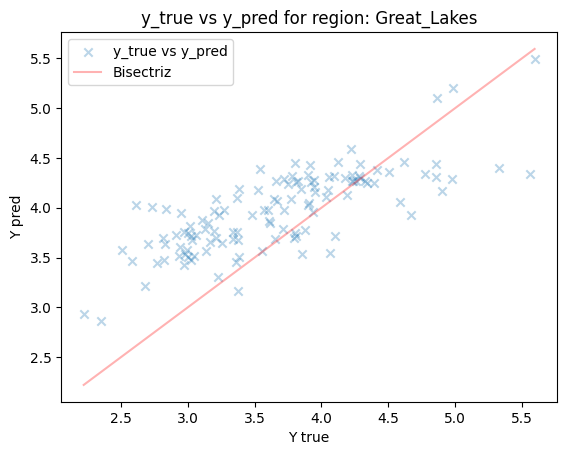

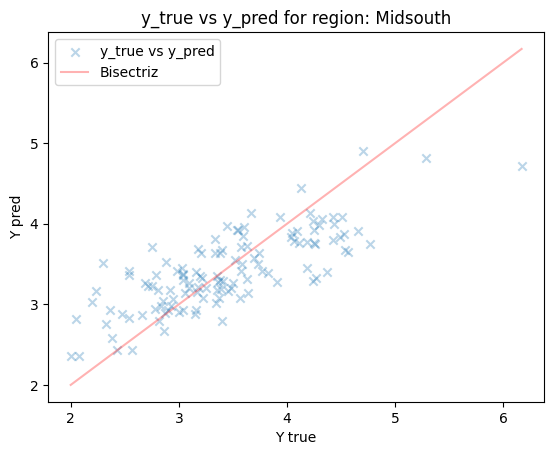

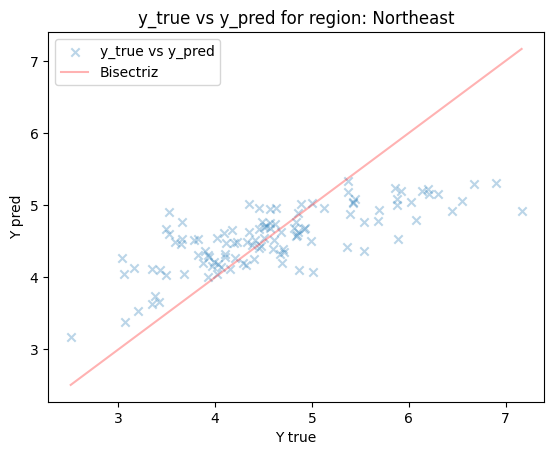

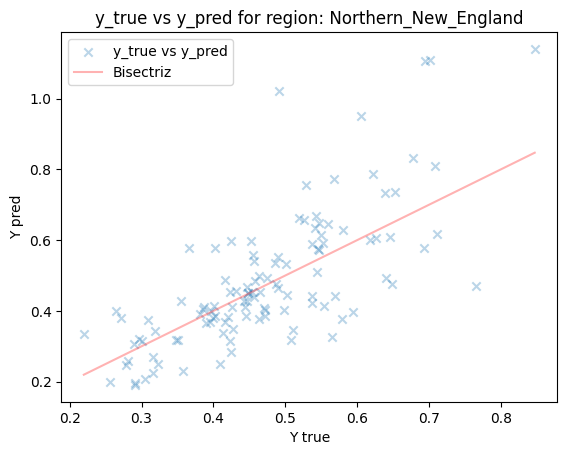

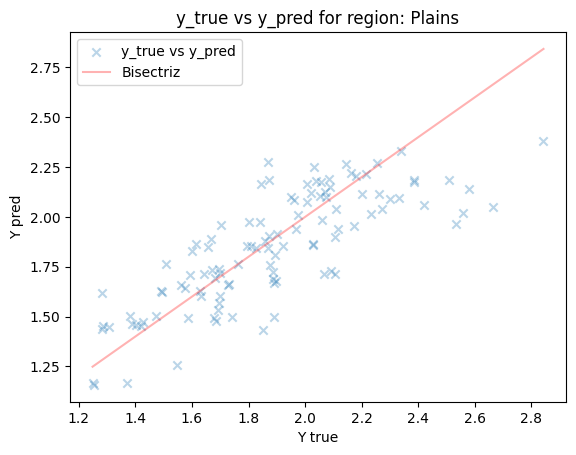

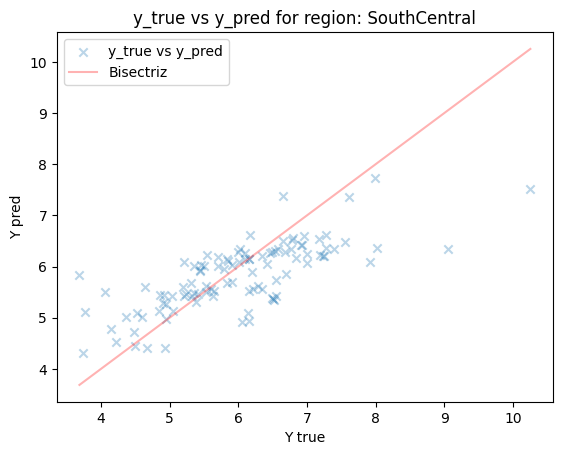

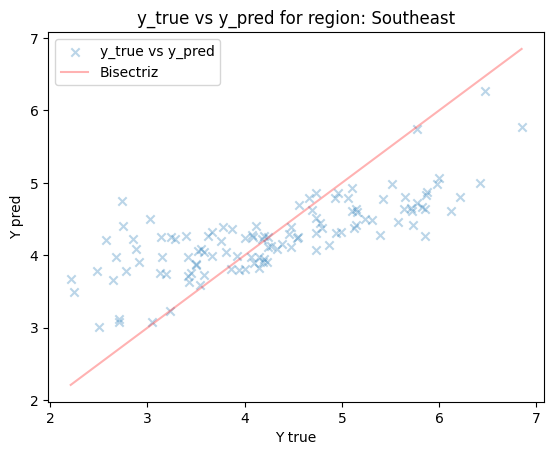

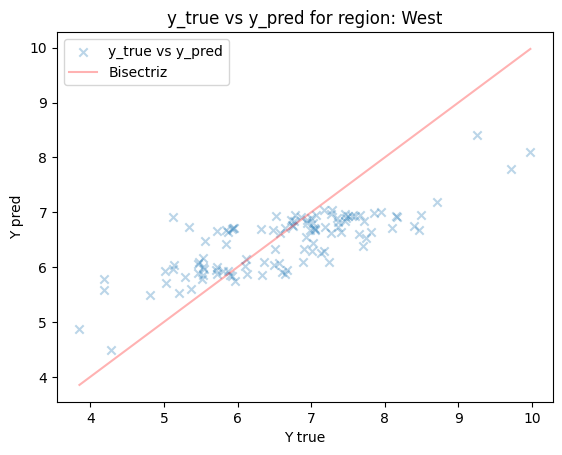

In [37]:
# DATA TEST
plot_y_true_vs_y_pred_each_regions(X = X_test.copy(),
                                   y = y_test.copy(),
                                   model = model_pipeline,
                                   list_regions = list_regions
                                  )

#### 8.5 Evaluate y_true vs y_pred by region (one plot true vs pred - colored by region)

In [38]:
X = X_train.copy()
y = y_train.copy()
model = model_pipeline

In [39]:
def plot_y_true_vs_y_pred_color_regions(X, y, model, list_regions):
    """
    y_true vs y_pred for all data, colored by region
    """

    # add column region in data "y" to filter data by region
    y['region'] = X[['region']]
    
    for region_name in list_regions:
        #print(region_name)
    
        # generate X filtered by region
        X_filter_region = X[X['region'] == region_name]
        #print('debugging order columns: ', X_filter_region.columns.tolist())
        
        # generate y filtered by region
        y_filter_region = y[y['region'] == region_name]
        y_filter_region = y_filter_region.drop(columns = 'region')
        
        # predict
        y_filter_region_pred = model.predict(X_filter_region)
        y_filter_region_pred = pd.DataFrame(y_filter_region_pred)
    
    
        # plot scatter plot for each region
        ### plot scatter plot
        fig_plot = plt.scatter(y_filter_region, 
                               y_filter_region_pred,
                              alpha = 0.3,
                              marker = 'x',
                              label = f'region: {region_name}')
        
        ### add names to axis
        plt.xlabel('Y true')
        plt.ylabel('Y pred')
    
    
    ### add bisectriz 
    x_bisectriz = np.linspace(y.min()[0], y.max()[0], y.shape[0])
    y_bisectriz = x_bisectriz  # Bisectriz: y = x
    plt.plot(x_bisectriz, y_bisectriz, label='Bisectriz', color='red')
    
    # title
    plt.title('y_true vs y_pred')
    plt.legend()

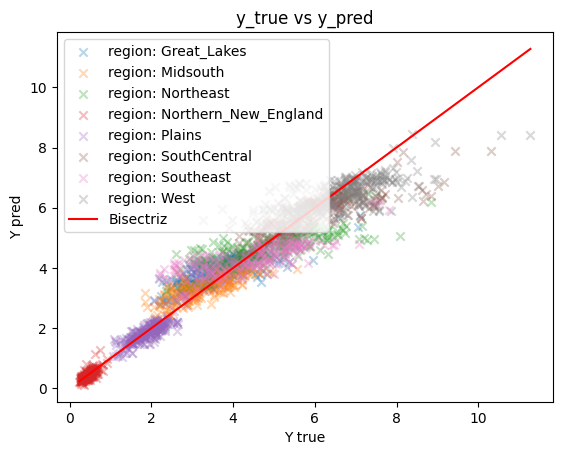

In [40]:
### DATA TRAIN
plot_y_true_vs_y_pred_color_regions(X = X_train.copy(),
                                    y = y_train.copy(),
                                    model = model_pipeline,
                                    list_regions = list_regions
                                   )

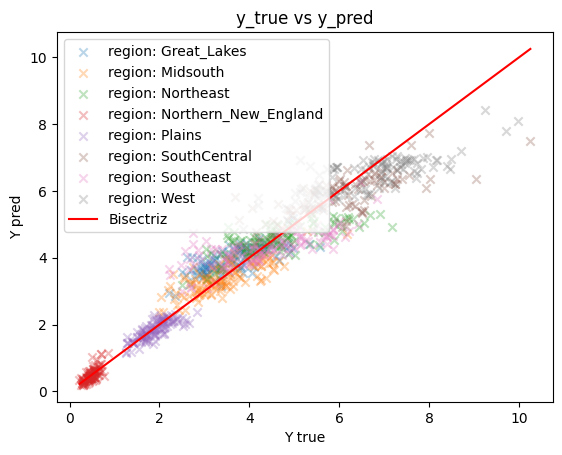

In [41]:
### DATA TEST
plot_y_true_vs_y_pred_color_regions(X = X_test.copy(),
                                    y = y_test.copy(),
                                    model = model_pipeline,
                                    list_regions = list_regions
                                   )

#### 8.X Evaluate model - business logic
Evaluate performance model according to a business logic